In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Equal number of rows are present for each class

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No null values in any column

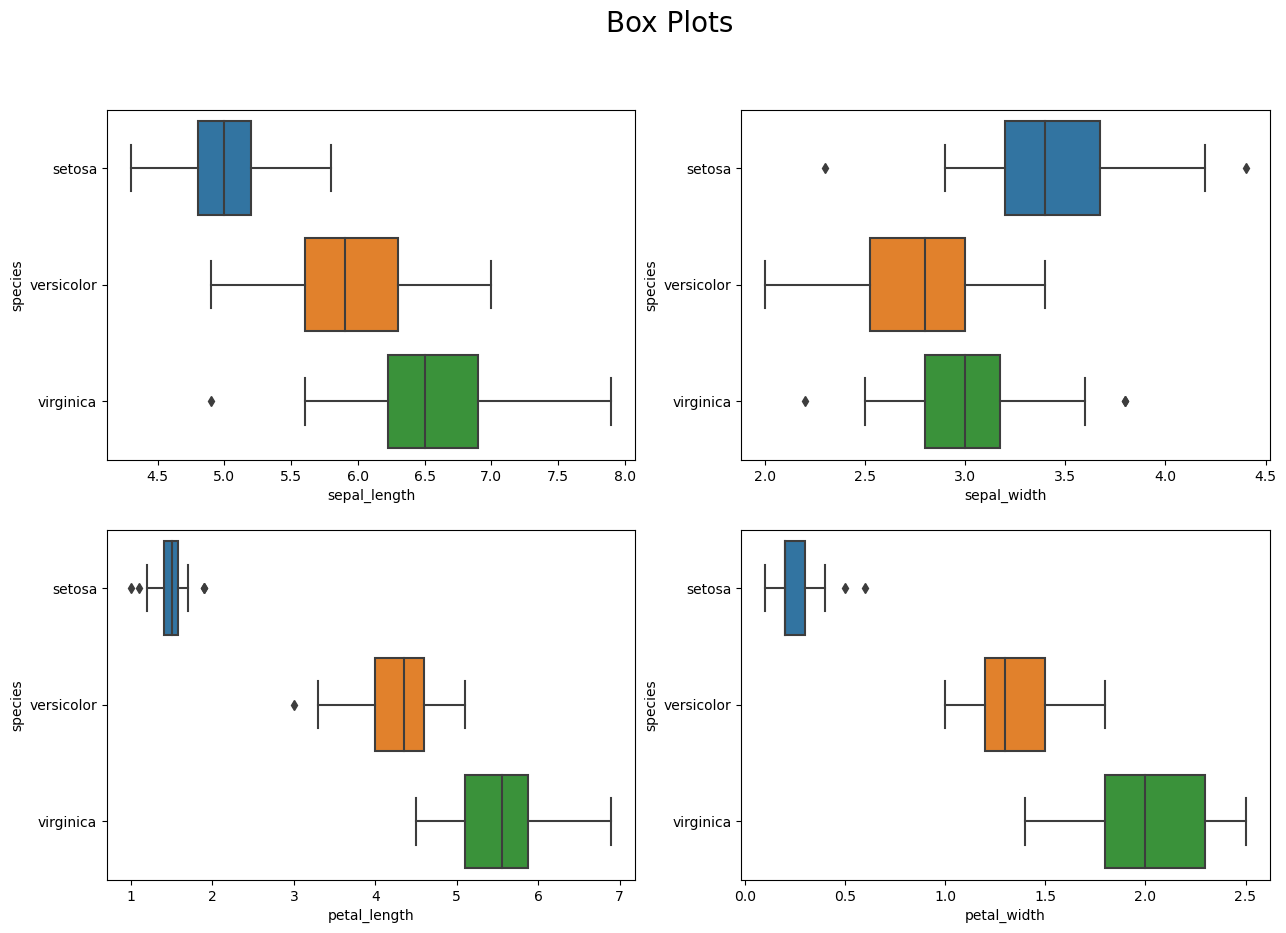

In [11]:
fig , ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

fig.suptitle('Box Plots',fontsize=20)

sns.boxplot(data=df, x='sepal_length', y='species' , ax=ax[0,0])
sns.boxplot(data=df, x='sepal_width', y='species', ax=ax[0,1])

sns.boxplot(data=df, x='petal_length', y='species', ax=ax[1,0])
sns.boxplot(data=df, x='petal_width', y='species', ax=ax[1,1])

plt.show()

outliers are present in different features for some classes 

Text(0.5, 1.0, 'Pair Plot')

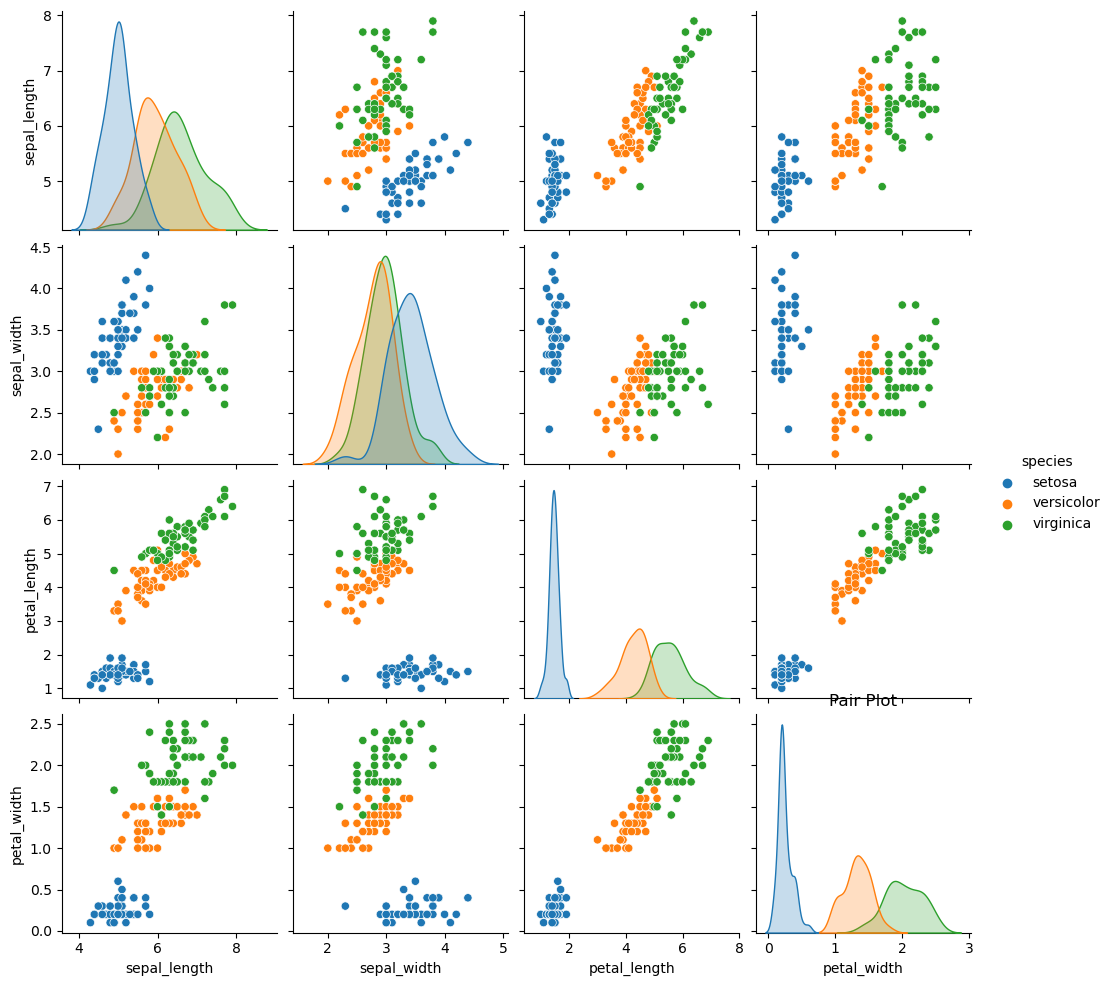

In [12]:
sns.pairplot(data = df,hue='species')
plt.title('Pair Plot')

Text(0.5, 1.0, 'Heatmap')

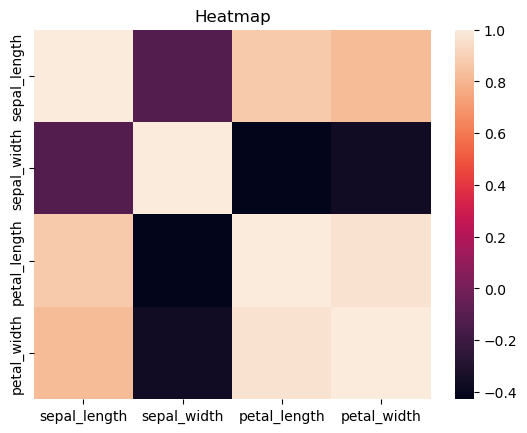

In [13]:
sns.heatmap(df.iloc[:,:-1].corr())
plt.title('Heatmap')

(petal_length and petal width) , (petal_length and sepal_length) , (petal_width and sepal_length) have strong correlation

### Train Test Split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('species',axis=1),df['species'],random_state=43)

In [15]:
x_train.shape

(112, 4)

In [16]:
x_test.shape

(38, 4)

### Label Encoding

In [17]:
le=LabelEncoder()
le.fit(df['species'])
y_train = le.transform(y_train)
y_test= le.transform(y_test)

### Scaling

In [18]:
ss = StandardScaler()
ss.fit(x_train)
x_train=ss.transform(x_train)
x_test=ss.transform(x_test)

### Model Training

In [19]:
performance = pd.DataFrame(columns=['model','accuracy','precision','recall'])

In [20]:
def training(model,model_name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    a = accuracy_score(y_test,y_pred)
    p = precision_score(y_test,y_pred,average='macro')
    r = recall_score(y_test,y_pred,average='macro')
    performance.loc[performance.shape[0]] = [model_name, a, p,r] 

In [21]:
training(LogisticRegression(multi_class='multinomial',max_iter=10000),'Logistic Regression')
training(SVC(decision_function_shape='ovo',max_iter=10000),'SVM (one vs one)')
training(LinearSVC(max_iter=10000),'SVM (one vs rest)')
training(DecisionTreeClassifier(ccp_alpha=0.2),'DecisionTreeClassifier')
training(RandomForestClassifier(ccp_alpha=0.2),'RandomForestClassifier')
training(BaggingClassifier(),'BaggingClassifier')
training(KNeighborsClassifier(),'KNeighborsClassifier')

In [22]:
performance

,model,accuracy,precision,recall
0,Logistic Regression,0.973684,0.974359,0.972222
1,SVM (one vs one),1.000000,1.000000,1.000000
2,SVM (one vs rest),0.973684,0.974359,0.972222
3,DecisionTreeClassifier,0.973684,0.974359,0.972222
4,RandomForestClassifier,0.947368,0.952381,0.944444
5,BaggingClassifier,0.947368,0.952381,0.944444
6,KNeighborsClassifier,0.947368,0.952381,0.944444


### Decision Boundry for RandomForestClassifier

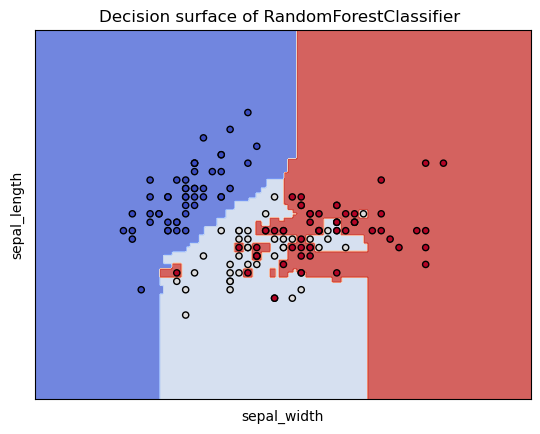

In [23]:
X=df.iloc[:,:2]
y=le.transform(df['species'])

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = RandomForestClassifier()
clf = model.fit(X, y)

fig, ax = plt.subplots()
title = ('Decision surface of RandomForestClassifier ')

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal_length')
ax.set_xlabel('sepal_width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

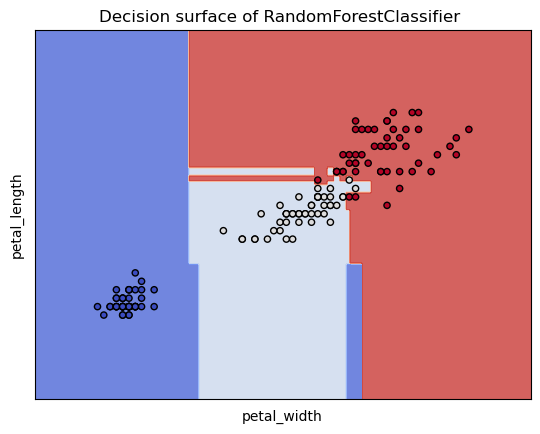

In [24]:
X=df.iloc[:,2:4]
y=le.transform(df['species'])

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = RandomForestClassifier()
clf = model.fit(X, y)

fig, ax = plt.subplots()
title = ('Decision surface of RandomForestClassifier ')

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('petal_length')
ax.set_xlabel('petal_width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

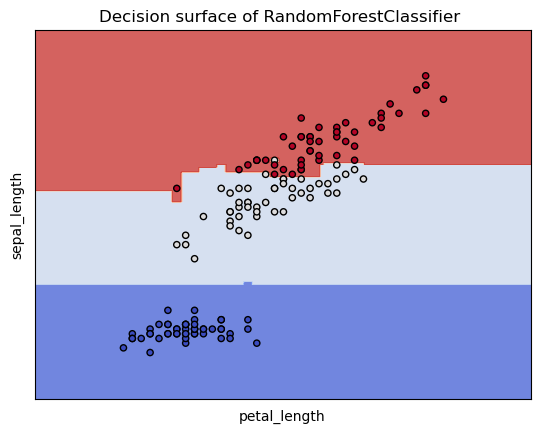

In [25]:
X=df[['sepal_length','petal_length']]
y=le.transform(df['species'])

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = RandomForestClassifier()
clf = model.fit(X, y)

fig, ax = plt.subplots()
title = ('Decision surface of RandomForestClassifier ')

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal_length')
ax.set_xlabel('petal_length')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

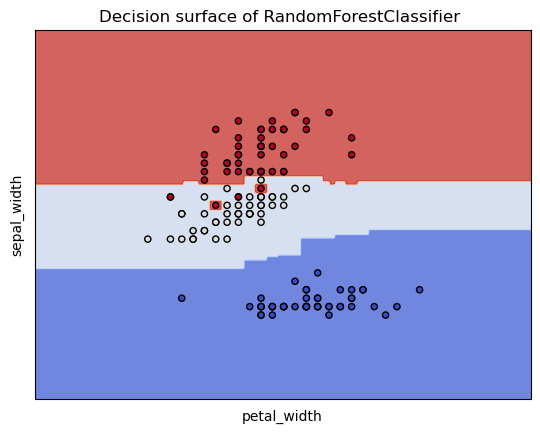

In [26]:
X=df[['sepal_width','petal_width']]
y=le.transform(df['species'])

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = RandomForestClassifier()
clf = model.fit(X, y)

fig, ax = plt.subplots()
title = ('Decision surface of RandomForestClassifier ')

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal_width')
ax.set_xlabel('petal_width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

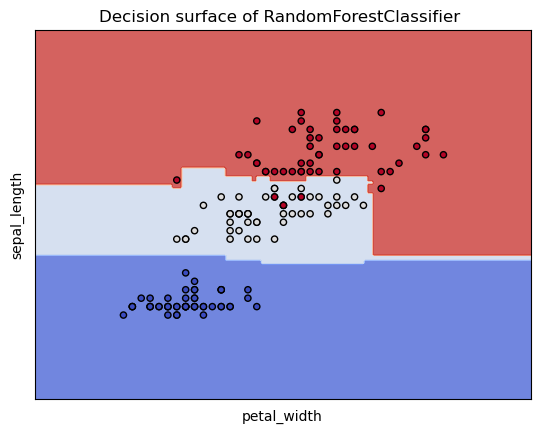

In [27]:
X=df[['sepal_length','petal_width']]
y=le.transform(df['species'])

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = RandomForestClassifier()
clf = model.fit(X, y)

fig, ax = plt.subplots()
title = ('Decision surface of RandomForestClassifier ')

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal_length')
ax.set_xlabel('petal_width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

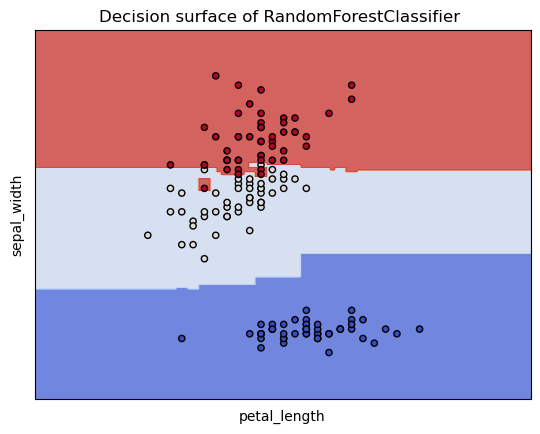

In [28]:
X=df[['sepal_width','petal_length']]
y=le.transform(df['species'])

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = RandomForestClassifier()
clf = model.fit(X, y)

fig, ax = plt.subplots()
title = ('Decision surface of RandomForestClassifier ')

X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal_width')
ax.set_xlabel('petal_length')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

### Pipeline

In [29]:
pipe = Pipeline(
    [('ss',StandardScaler()),('rfc',RandomForestClassifier())]
)

In [30]:
pipe.fit(df.iloc[:,:-1],df['species'])

Pipeline(steps=[('ss', StandardScaler()), ('rfc', RandomForestClassifier())])

### Pickle

In [287]:
import pickle
pickle.dump(pipe,open('iris_model','wb'))
pickle.dump(le,open('iris_encoder','wb'))

In [381]:
le.inverse_transform([0,1,2])

array(['setosa', 'versicolor', 'virginica'], dtype=object)